# FUNDAAMENTALS 19. 선형 회귀와 로지스틱 회귀

## 19-1 회귀(Regression)에 대하여

### 회귀분석이란?
  - 회귀분석이란 관찰된 여러 데이터를 기반으로 각 연속형 변수 간의 관계를 모델링하고 이에 대한 적합도를 측정하는 분석 방법이다.
  - 회귀분석으로 풀 수 있는 실생활 문제의 몇 가지 예시
      1. 부모의 키와 자식의 키 사이의 관계
      2. 자동차의 스펙을 이용한 가격 예측
      3. 1인당 국민 총 소득과 배기가스 배출량 사이의 관계 예측
  - 위에서 제시된 문제들은 모두 독립변수와 종속변수 사이의 상호 관련성을 규명하는 것들이다.
  - 두 변수 사이의 관계를 직선 형태로 가정하고 분석하는 것을 선형 회귀분석(Linear Regression)이라고 한다.

### 지도학습의 두 종류 :  분류와 회귀

  - 머신러닝은 대부분 데이터 x에 대한 정답 y가 주어지는 지도학습이다.
  - 지도학습은 크게 분류(Classification)과 회귀(Regression) 문제로 나뉜다.
  - 분류는 데이터 x의 여러 feature값들을 이용해 해당 데이터의 클래스 y를 추론하는 것이다.
  - 회귀는 데이터 x의 여러 feature값들을 이용해 연관된 다른 데이터 y의 정확한 값을 추론하는 것이다.

## 19-2 선형 회귀 분석(Linear Regression)

  - 선형회귀는 종속변수 Y와 한개 이상의 독립변수 X와의 선형 상관관계를 모델링하는 회귀분석 기법이다.
  - 여기서 독립변수의 개수에 따라 한개의 독립변수를 가진 방식은 단순 선형회귀, 둘 이상의 독립변수를 가진 경우에는 다중 선형회귀라고 한다.

### 선형 회귀 모델링
  - 기본적인 선형회귀식은 다음과 같이 나타낼 수 있다.
 ### y=βx+ϵ
 
 
  - 여기서 β는 회귀계수라고 불리며 ϵ는 종속 변수와 독립 변수 사이의 오차를 의미한다.
  - 이들은 우리가 데이터로부터 추정해야 하는 파라미터라고 할 수 있다.
  - 선형회귀 모델을 찾는다는 것은 주어진 데이터에 우리의 선형 식이 잘 맞도록 회귀계수 및 오차를 구하는 것이다.

### 머신러닝에서의 선형회귀모델 표기법
  - 머신러닝 기반의 방법에서는 조금 다른 변수값을 사용해서 식을 나타낸다.
  ### H=Wx+b
  
  
  - 위의 식에서 H를 가정(Hypothesis), W를 가중치(Weight), b를 편향(bias)로 부른다.

### 용어 설명

  - 잔차(Residuals)란 회귀모델을 이용해 추정한 값과 실제 데이터의 차이를 의미한다.
  - 예를 들어 우리가 (2,8)이라는 데이터를 가지고 있고 선형 회귀모델의 식이 y = 2x + 3이면 잔차 값은 8(실제 데이터 y값) - 7(실제 데이터의 x값을 모델에 넣어서 얻은 추론한 y값) = 1 이 된다.
  - 최소제곱법은 잔차를 이용해 주어진 점 데이터들을 설명하는 회귀모델을 찾는 가장 대표적인 방법이다.
  
  - 결정계수는 (R2 score 등으로 표기) 0에서 1 사이의 값으로 나타나는데 1에 가까울수록 해당 회귀모델이 데이터를 잘 표현한다고 볼 수 있다.

### Boston dataset을 이용해 선형회귀모델 구해보기

In [1]:
# 데이터셋 준비 - 사이킷런에서 제공하는 Boston house prices dataset을 활용

from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
1,0.03659,25.0,4.86,0.0,0.426,6.302,32.2,5.4007,4.0,281.0,19.0,396.90,6.72
2,0.25387,0.0,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
4,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73


  - Boston dataset은 총 506개의 row와 13가지의 attribute로 구성되어 있다.
  - 그리고 각 row에 대응하는 price가 존재한다.
  - 데이터의 attribute가 의미하는바가 무엇인지 궁금하면 DESCR을 수행해서 확인할 수 있다.

In [2]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

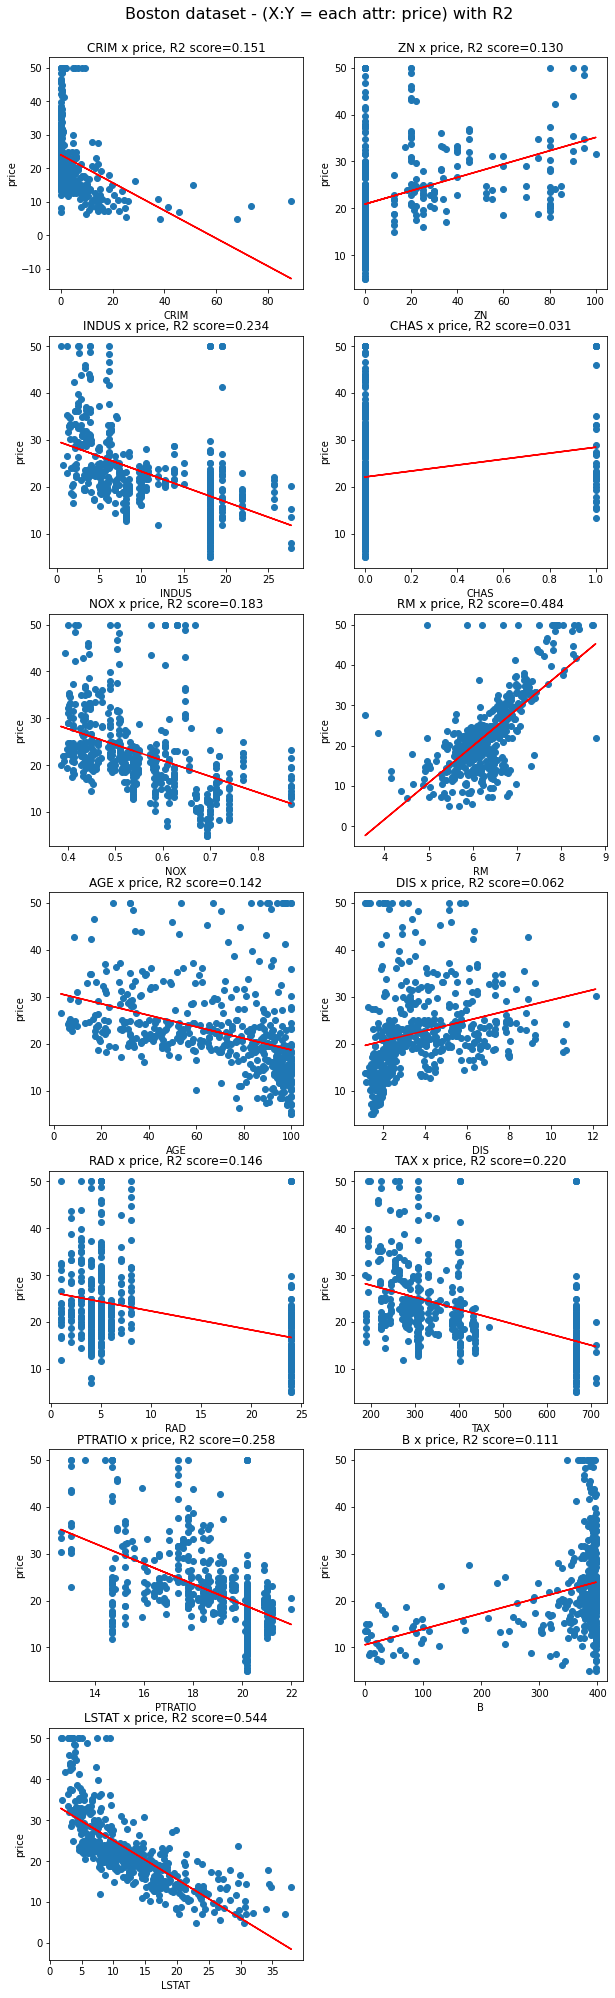

In [3]:
# Linear Regression 적용해보기

# Boston dataset의 각 attribute에 선형회귀 적용하는 예제
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.

    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름
    estimator = LinearRegression() # 선형 회귀 모델이에요.

    #x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하는 과정이에요
    estimator.fit(single_attr, price) 

    #위 fit() 과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때의 예측 Y 값이에요. 
    pred_price = estimator.predict(single_attr)

    score = metrics.r2_score(price, pred_price) # 결정계수를 구하는 함수에요. 

    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

  - 위의 결과를 통해서 결정계수(R2 score)가 높은 LSTAT(0.544)와 RM(0.484)를 그린 선형회귀모델이 데이터를 그나마 잘 설명한다는 것을 확인할 수 있다.

### 경사하강법(Gradient Descent Algorithm)

  - 적절한 회귀모델의 회귀계수를 찾기 위해서는 손실함수를 잘 설정하는 것이 중요하다.
  - 그렇기 때문에 머신러닝에서는 가중치의 그래디언트가 최소가 되는 지점이 손실함수를 최소로 하는 지점일 것이라는 가정을 한다.

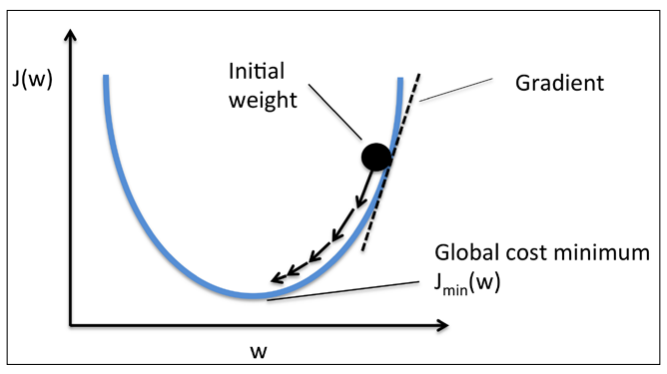
[출처 : https://lsh424.tistory.com/9]


  - 위 그림에서 J(w)를 최소로 하는 가중치 값을 가지려면 기울기(그래디언트)값이 가장 작은 중앙에 놓는 것이 좋다.
  - 최적의 값을 찾기 위해서는 learning rate가 중요한데 learning rate가 너무 크면 최적의 w값을 건너뛰는 경우가 생긴다.

## 19-3 로지스틱 회귀분석(Logistic Regression)

  - 로지스틱 회귀분석이란 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘이다.
  - 1개 이상의 독립변수가 있을 때 이를 이용해 데이터가 2개의 범주 중 하나에 속하도록 결정하는 이진 분류 문제를 풀 때 로지스틱 회귀분석을 많이 사용한다.

### 로지스틱 회귀의 예측 단계

  - 실제 데이터를 대입하여 Odds 및 회귀계수를 구한다.
  - Log-odds를 계산한 후 이를 sigmoid function의 입력으로 넣어서 특정 범주에 속할 확률 값을 계산한다.
  - 설정한 threshold에 맞춰 설정값 이상이면 1, 이하면 0으로 이진분류를 수행한다.

In [4]:
# 유방암 데이터셋을 이용한 로지스틱 회귀분석 사용

# 로지스틱 회귀분석 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() #로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용하여 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력


# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 주의할 점
  - 로지스틱 회귀는 회귀모델일까? 아니면 분류모델일까?
  - 유방암 데이터셋은 이진 분류 문제지만 로지스틱 회귀는 회귀 모델이다.
  - 모델이 리턴하는 값이 연속적인 변수라는 점에서 로지스틱 회귀는 회귀 모델의 정의에 부합하다.
  - 로지스틱 회귀 분석은 의료, 통신, 데이터마이닝과 같은 다양한 분야에서 분류 및 예측을 위한 모델로서 폭넓게 사용되고 있다.

## 19-4 Softmax 함수와 Cross Entropy

### Softmax 함수
  - 다중 로지스틱 회귀로 확장될 경우 시그모이드 함수는 여러 범주로 분류하는 함수인 softmax 함수로 확장되어야 한다.
  - softmax 함수는 2가지가 아닌 여러 범주로 분류하는 함수이다.
  - softmax 함수는 큰 log-odds와 작은 log-odds의 차이를 극대화시켜준다.
  - 그래서 가장 큰 값을 1, 그 외의 나머지 값을 0으로 인코딩 하는 one-hot encoding을 통해 표현하게 된다.

### Cross Entropy
  - Cross Entropy는 softmax 함수의 손실함수로 사용된다.

In [6]:
# softmax 및 cross entropy를 사용한 예제
# 유방암 데이터셋을 사용함

import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()
model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax', input_shape=(30,)))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 1s 2ms/step - loss: 362.4220 - accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 329.1064 - accuracy: 0.6270
Epoch 3/20
16/16 [==============================] - 0s 1ms/step - loss: 295.3923 - accuracy: 0.6270
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 262.5746 - accuracy: 0.6270
Epoch 5/20
16/16 [==============================] - 0s 1ms/step - loss: 229.2101 - accuracy: 0.6270
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 196.1903 - accuracy: 0.6270
Epoch 7/20
16/16 [==============================] - 0s

In [7]:
# Dense 레이어를 더 쌓아서 딥러닝 모델로 만들 수 있다.

import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()

#레이어 3장을 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 62        
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 0s 2ms/step - loss: 28.8728 - accuracy: 0.5371
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 8.4539 - accuracy: 0.6309
Epoch 3/20
16/16 [==============================] - 0

### 정리하기

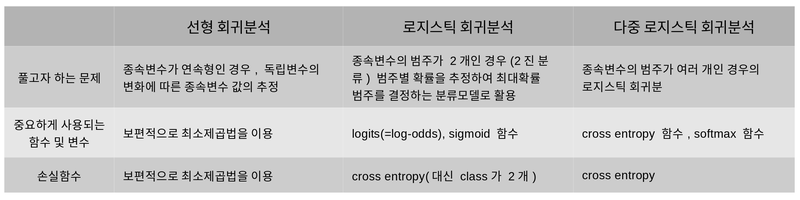

출처 : LMS node 19번